<a href="https://colab.research.google.com/github/farzanekram07/Python/blob/main/Vechile_Routing_using_Gurobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VECHILE ROUTING PROBLEM

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
rnd = np.random
rnd.seed(0)

In [3]:
n = 10
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

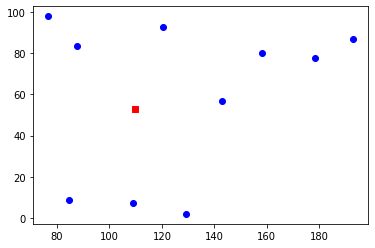

In [28]:
plt.plot(xc[0],yc[0],c='r',marker ='s')
plt.scatter(xc[1:],yc[1:], c='b')

In [5]:
N = [i for i in range(1,n+1)]
V = [0] +N
A = [(i,j) for i in V for j in V if i!= j]
c = {(i,j): np.hypot(xc[i]- xc[j],yc[i]-yc[j]) for i, j in A}
Q = 20
q = {i: rnd.randint(1,10) for i in N}

In [6]:
q

{1: 4, 2: 4, 3: 4, 4: 8, 5: 1, 6: 2, 7: 1, 8: 5, 9: 8, 10: 4}

In [9]:
from gurobipy import Model, GRB, quicksum

In [8]:
pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 4.6 MB/s 


In [10]:
mdl = Model('CVRP')

Restricted license - for non-production use only - expires 2023-10-25


In [11]:
x = mdl.addVars(A, vtype= GRB.BINARY)
u = mdl.addVars(N, vtype= GRB.CONTINUOUS)

In [12]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*c[i,j] for i,j in A ))

In [18]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!= i)==1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for i in V if i!= j)==1 for j in N);
mdl.addConstrs((x[i,j]==1) >> (u[i]+q[i]==u[j]) for i,j in A if i!= 0 and j!=0);
mdl.addConstrs(u[i]>=q[i] for i in N);
mdl.addConstrs(u[i]<=Q for i in N);

In [19]:
mdl.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 90 rows, 120 columns and 720 nonzeros
Model fingerprint: 0xc96d604d
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 128 rows and 12 columns
Presolve time: 0.06s
Presolved: 218 rows, 132 columns, 1301 nonzeros
Variable types: 42 continuous, 90 integer (90 binary)
Found heuristic solution: objective 885.6836867

Root relaxation: objective 3.068464e+02, 44 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0    

In [21]:
active_arcs = [a for a in A if x[a].x>0.99]

In [22]:
active_arcs

[(0, 2),
 (0, 5),
 (1, 0),
 (2, 10),
 (3, 4),
 (4, 6),
 (5, 3),
 (6, 9),
 (7, 1),
 (8, 7),
 (9, 0),
 (10, 8)]

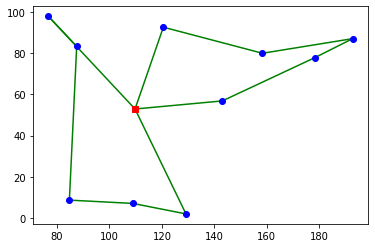

In [26]:
plt.plot(xc[0],yc[0],c='r',marker ='s')
plt.scatter(xc[1:],yc[1:],c='b')
for i,j in active_arcs:
  plt.plot([xc[i], xc[j]],[yc[i],yc[j]], c='g', zorder = 0)